<a href="https://colab.research.google.com/github/mochradja/DataScience/blob/main/E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
df = pd.read_csv("sample_data/ecommerce_sales.csv", parse_dates=["Order Date"])


df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [ ]:
df.isnull().any()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

In [ ]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [ ]:
df['Order ID'].unique()

array(['176558', nan, '176559', ..., '259355', '259356', '259357'],
      dtype=object)

In [ ]:
df['Order ID'].fillna('0', inplace=True)

In [ ]:
df.isnull().sum()

Order ID              0
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [ ]:
df['Product'].unique()

array(['USB-C Charging Cable', nan, 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor',
       'Product'], dtype=object)

In [ ]:
df['Product'].fillna('anonymous', inplace=True)

In [ ]:
df.isnull().sum()

Order ID              0
Product               0
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [ ]:
df['Quantity Ordered'].fillna('0', inplace=True)

In [ ]:
df.isnull().sum()

Order ID              0
Product               0
Quantity Ordered      0
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [ ]:
df['Price Each'].unique()

array(['11.95', nan, '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', 'Price Each', '700.0', '1700.0',
       '150.0', '300.0', '400.0'], dtype=object)

In [ ]:
df['Price Each'].fillna('0', inplace=True)

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [ ]:
df['Days'] = df['Order Date'].dt.day
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Days,Month,Year
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19.0,4.0,2019.0
1,0,anonymous,0,0,NaT,unlisted,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",7.0,4.0,2019.0
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12.0,4.0,2019.0
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12.0,4.0,2019.0
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",17.0,9.0,2019.0
186846,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",1.0,9.0,2019.0
186847,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",23.0,9.0,2019.0
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",19.0,9.0,2019.0


In [ ]:
df.isnull().sum()

Order ID              0
Product               0
Quantity Ordered      0
Price Each            0
Order Date          545
Purchase Address    545
dtype: int64

In [ ]:
df['Order Date'].unique()

array(['04/19/19 08:46', nan, '04/07/19 22:30', ..., '09/23/19 07:39',
       '09/19/19 17:30', '09/30/19 00:18'], dtype=object)

In [ ]:
df['Order Date'].fillna('0', inplace=True)

In [ ]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [ ]:
df['Purchase Address'].unique()

array(['917 1st St, Dallas, TX 75001', nan,
       '682 Chestnut St, Boston, MA 02215', ...,
       '981 4th St, New York City, NY 10001',
       '840 Highland St, Los Angeles, CA 90001',
       '220 12th St, San Francisco, CA 94016'], dtype=object)

In [ ]:
df['Purchase Address'].fillna('unlisted', inplace=True)

In [ ]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [ ]:
df['Price Each'] = pd.to_numeric(df['Price Each'], errors="coerce")
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors="coerce")

df['Sales'] = df['Price Each'] * df['Quantity Ordered']
df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Days,Month,Year,price Each,Sales
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19.0,4.0,2019.0,11.95,23.90
1,0,anonymous,0.0,0.00,NaT,unlisted,NaN,NaN,NaN,0.00,0.00
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",7.0,4.0,2019.0,99.99,99.99
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12.0,4.0,2019.0,600.00,600.00
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12.0,4.0,2019.0,11.99,11.99
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",17.0,9.0,2019.0,2.99,8.97
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",1.0,9.0,2019.0,700.00,700.00
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",23.0,9.0,2019.0,700.00,700.00
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",19.0,9.0,2019.0,379.99,379.99


In [ ]:
df.to_csv('sample_data/ecommerce_sales.csv', index=False)

INSIGH

PADA BULAN APA PERUSAHAAN MEMILIKI PENDAPATAN MAX DAN MIN

In [ ]:
sales = df['Sales'].groupby(df.Month).agg('sum').reset_index()
sales_max_min = sales[(sales['Sales'] == sales['Sales'].max()) | (sales['Sales'] == sales['Sales'].min())]
sales_max_min

,Month,Sales
0,1.0,1822256.73
11,12.0,4613443.34


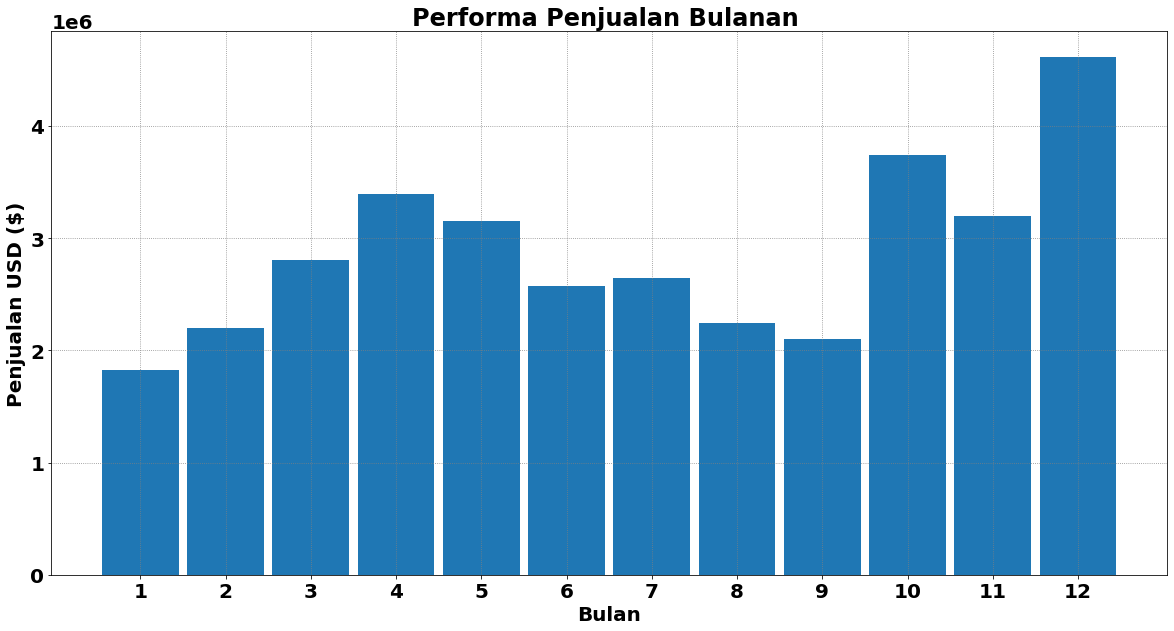

In [ ]:
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size' : 20, 'font.weight' : 'bold'})

plt.bar(sales.Month, sales.Sales, width=0.9)

plt.xticks(sales.Month)
plt.xlabel("Bulan", fontdict={'fontweight' : 'bold'})
plt.ylabel("Penjualan USD ($)", fontdict={'fontweight' : 'bold'})
plt.title("Performa Penjualan Bulanan ", fontdict={'fontweight' : 'bold'})
plt.grid(ls=':', color='grey')
plt.show()

INSIGHT 

PRODUK YG LARIS TERJUAL

In [ ]:
data = df['Quantity Ordered'].groupby(df.Product).agg(['sum'])
data = data.reset_index()
data

,Product,sum
0,20in Monitor,4129.0
1,27in 4K Gaming Monitor,6244.0
2,27in FHD Monitor,7550.0
3,34in Ultrawide Monitor,6199.0
4,AA Batteries (4-pack),27635.0
5,AAA Batteries (4-pack),31017.0
6,Apple Airpods Headphones,15661.0
7,Bose SoundSport Headphones,13457.0
8,Flatscreen TV,4819.0
9,Google Phone,5532.0


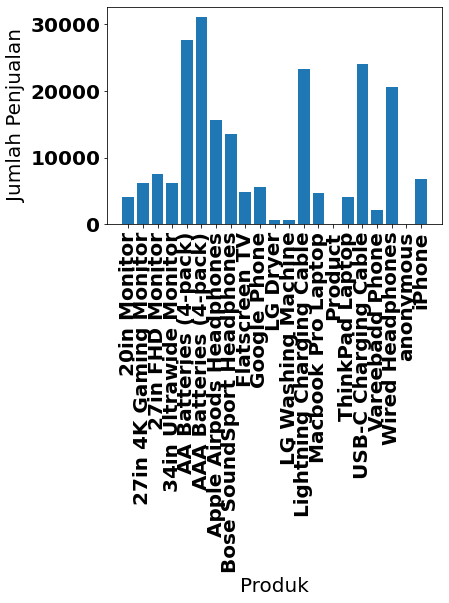

In [ ]:
plt.bar(data.Product, data['sum'])
plt.xticks(data.Product, rotation=90)
plt.ylabel('Jumlah Penjualan')
plt.xlabel('Produk')
plt.show()

INSIGHT

DATA UNTUK TIM MARKETING

In [ ]:
df['Days'] = df['Order Date'].dt.day
data = df['Quantity Ordered'].groupby(df.Days).agg(['sum'])
data

,sum
Days,
1.0,6867.0
2.0,6962.0
3.0,6534.0
4.0,6813.0
5.0,6816.0
6.0,6778.0
7.0,6779.0
8.0,6824.0
9.0,6836.0


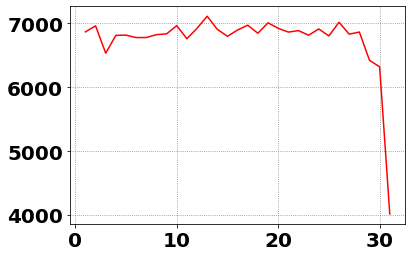

In [ ]:
plt.plot(data.index, data['sum'], color='red')
plt.grid(ls=':', color='grey')